In [1]:
import yfinance as yf
import datetime
import pandas as pd
import requests

In [249]:
# China
BOND_TICKER = 'CYB.SI' # in USD CSOP Investments VCC - ICBC CSOP FTSE Chinese Government Bond Index ETF
# BOND_TICKER = 'CBON' # in USD: https://www.vaneck.com/us/en/investments/chinaamc-china-bond-etf-cbon/overview/
EQUITY_TICKER = 'GXC' # in USD: SPDR S&P China ETF

# US
BOND_TICKER = 'GOVT'
EQUITY_TICKER = 'SPY'

# EM
# EQUITY_TICKER = 'EEM'
# BOND_TICKER = 'EMB'

# UK
# EQUITY_TICKER = 'EWU'
# BOND_TICKER = 'EMB'



[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

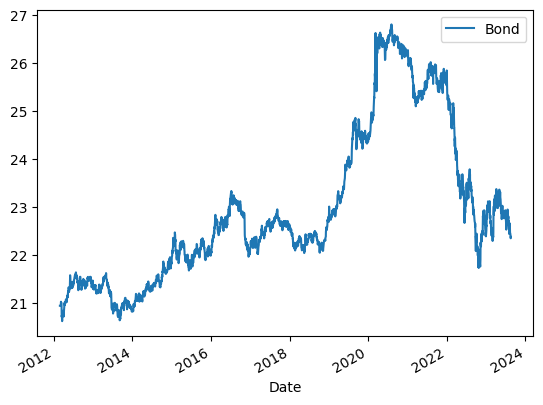

In [250]:
bond_data = yf.download(BOND_TICKER, start=datetime.date(1900,1,1))[['Adj Close']]
bond_data.columns = ['Bond']
bond_data = bond_data[1:]
bond_data.plot()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

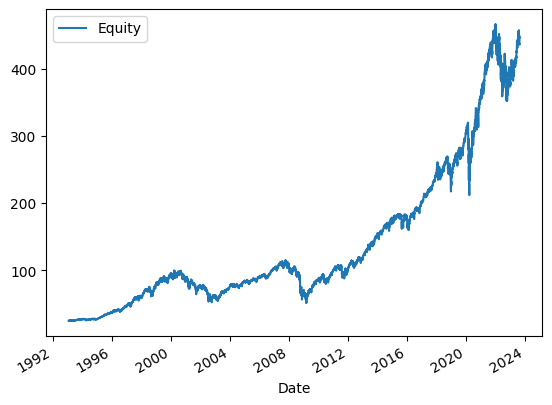

In [251]:
eq_data = yf.download(EQUITY_TICKER, start=datetime.date(1900,1,1))[['Adj Close']]
eq_data.columns = ['Equity']
eq_data.plot()

In [252]:
# currency
fx_data = yf.download('CNY=X', start=datetime.date(1900,1,1))[['Adj Close']]
fx_data.columns = ['FX']

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

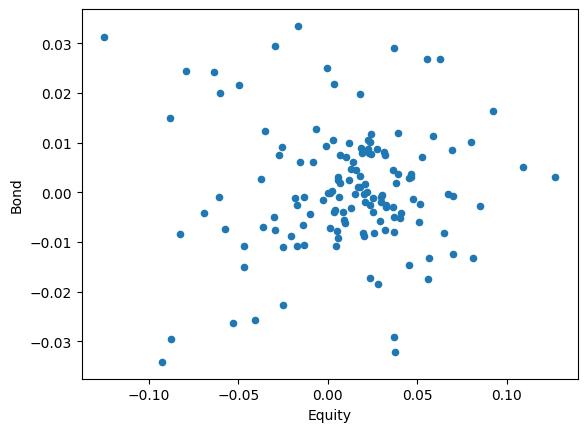

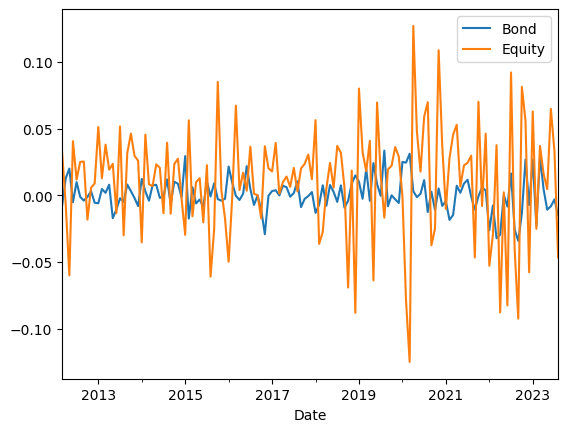

In [253]:
data_df = bond_data.join(eq_data)
data_df = data_df.resample('M').last().pct_change().dropna()
data_df['Equity'] = data_df['Equity']
data_df['Bond'] = data_df['Bond']
# data_df = data_df.drop(columns='FX')
data_df.plot.scatter(x='Equity',y='Bond')
data_df.plot()

In [254]:
eq_bond_correlations = data_df.rolling(36).corr().dropna().reset_index().query('level_1=="Bond"')[['Date','Equity']]
eq_bond_correlations.columns = ['Date','Correlation']
eq_bond_correlations = eq_bond_correlations.set_index('Date')

<Axes: xlabel='Date'>

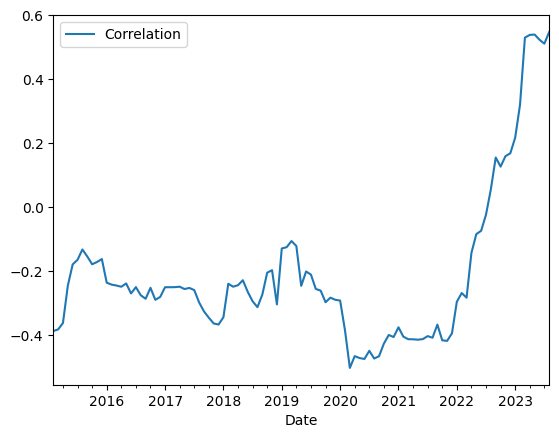

In [255]:
eq_bond_correlations.plot()

In [260]:
# Alternative: To get China 5Y/10Y bond directly

# https://tradingeconomics.com/china/government-bond-yield
# 10Y
URL = 'https://markets.tradingeconomics.com/chart?s=gcny10yr:gov&span=max&securify=new&url=/china/government-bond-yield&AUTH=T1TOwyTJQPEjJHiByNd6B7KaWafactpeqgly6slGIOLOOAAdXxHx5Ygf3Cx5sLoW&ohlc=0'
# 5Y
URL = 'https://markets.tradingeconomics.com/chart?s=gcny5y:gov&span=max&securify=new&url=/china/5-year-note-yield&AUTH=Wuvrq9lKRMh5FKIhZZ2NU53V4B0hhr4pi3EjY7zfhTRWfVSToAaXEXTmuFvPmhmW&ohlc=0'

# UK 10Y
URL = 'https://markets.tradingeconomics.com/chart?s=gukg10:ind&span=max&securify=new&url=/united-kingdom/government-bond-yield&AUTH=0XgvgvHt3zHhIfAyNp92yIheEej2gHuzLNlMXZvPoOyQCQeYfCVFItiFNexfF26oWXCKHYlfFcPk7bgftkQ0Ow%3D%3D&ohlc=0'

# USD
URL = 'https://markets.tradingeconomics.com/chart?s=usgg10yr:ind&span=max&securify=new&url=/united-states/government-bond-yield&AUTH=0XgvgvHt3zHhIfAyNp92yKnsyNW9vyHmS%2FHgNuuyXdedzvykmpt1P56%2FT8vkjdCj7gV8Z5tS3KNS%2BBbPJbEGfg%3D%3D&ohlc=0'

# sending get request and saving the response as response object
r = requests.get(url = URL)
 
# extracting data in json format
data = r.json()

In [261]:
chinese_bond_yield = pd.DataFrame(data['series'][0]['data'])
chinese_bond_yield = chinese_bond_yield.set_index('date')[['y']].rename(columns={'y': 'Yield'})
chinese_bond_yield.index = pd.to_datetime(chinese_bond_yield.index)

<Axes: xlabel='Date'>

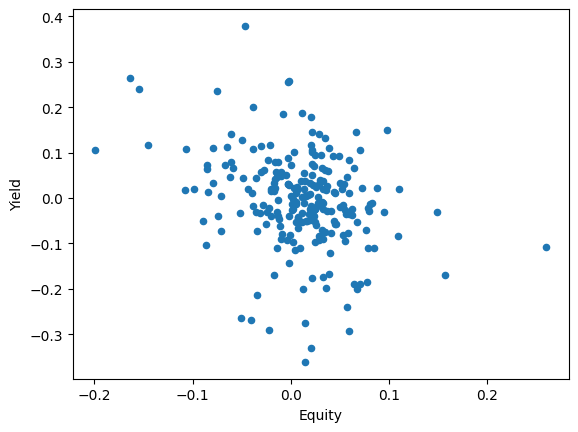

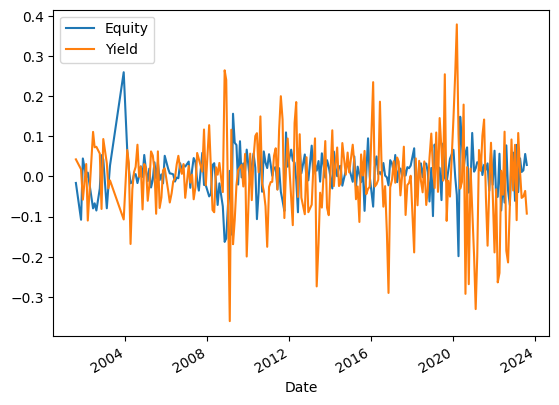

In [262]:
chinese_df_v2 = eq_data.join(chinese_bond_yield).join(fx_data)
chinese_df_v2 = chinese_df_v2.dropna().pct_change().dropna()
chinese_df_v2['Yield'] = chinese_df_v2['Yield'].mul(-1)
chinese_df_v2['Equity'] = chinese_df_v2['Equity']
chinese_df_v2 = chinese_df_v2.drop(columns='FX')
chinese_df_v2.plot.scatter(x='Equity',y='Yield')
chinese_df_v2.plot()

In [263]:
chinese_eq_bond_correlations_v2 = chinese_df_v2.rolling(50).corr().dropna().reset_index().query('level_1=="Yield"')[['Date','Equity']]
chinese_eq_bond_correlations_v2.columns = ['Date','Correlation']
chinese_eq_bond_correlations_v2 = chinese_eq_bond_correlations_v2.set_index('Date')

<Axes: xlabel='Date'>

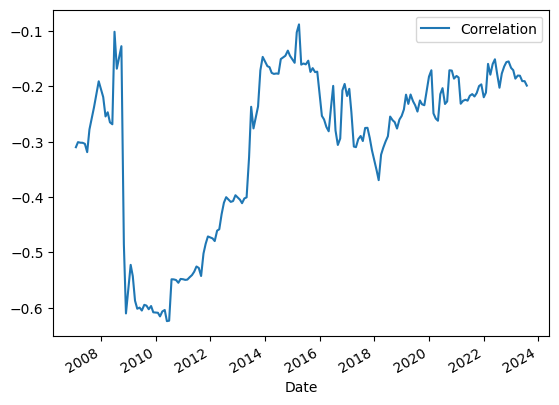

In [264]:
chinese_eq_bond_correlations_v2.plot()